## The given data contain the churners (people who stops using a particular service) along with their gender and location , interested in finding which city and gender have more churners using bivariate and univariate data analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
data=pd.read_csv("C:/Users/Dell/EDA_PROJECTS/Churn_Modelling.csv")

# Univariate Analysis

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
new_data=data[["Geography","Gender","Exited"]]
new_data.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [7]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

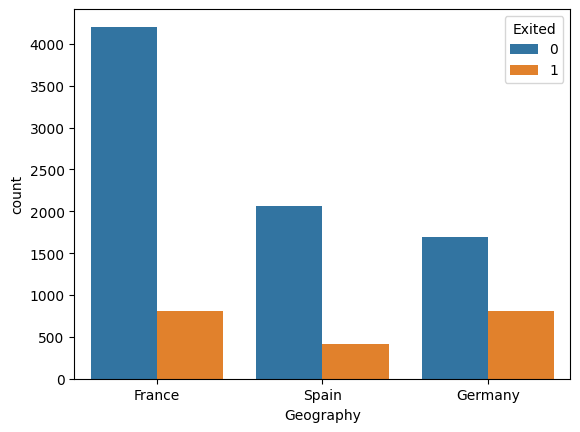

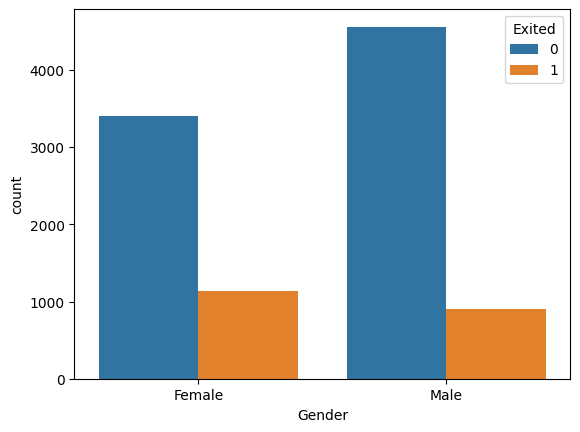

In [8]:
for i, predictor in enumerate(new_data.drop(columns=["Exited"])):
    plt.figure()
    sns.countplot(data=new_data,x=predictor,hue="Exited")

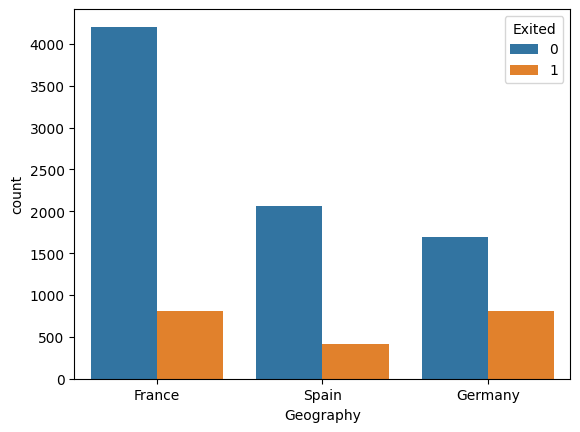

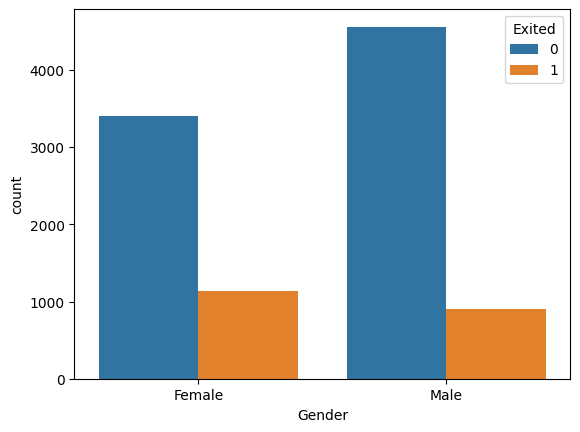

In [9]:
for x in new_data.drop(columns=["Exited"]):
    plt.figure()
    sns.countplot(data=new_data,x=x,hue="Exited")

# Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

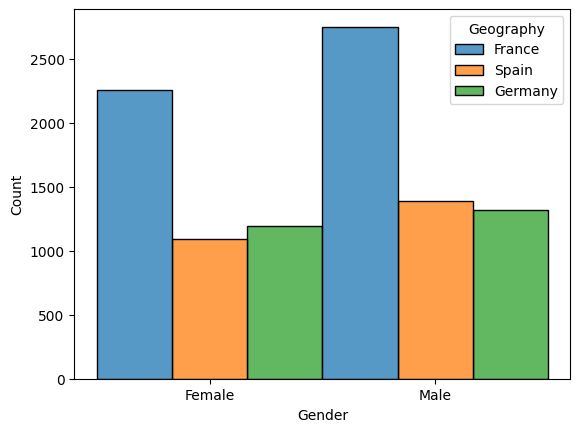

In [10]:
sns.histplot(x="Gender",hue="Geography",data=new_data,stat="count",multiple="dodge")

In [26]:
n_data=new_data.loc[new_data["Exited"]==1]

In [27]:
n_data.head()

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1


<Axes: xlabel='Gender', ylabel='Count'>

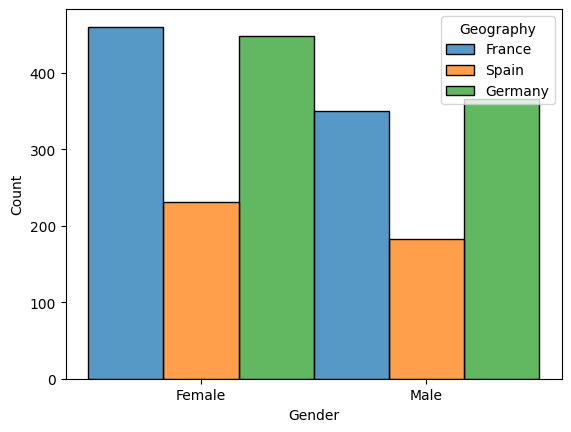

In [20]:
sns.histplot(x="Gender",hue="Geography",data=n_data,stat="count",multiple="dodge")

In [17]:
count = n_data.groupby(["Geography", "Gender"]).size()
count

Geography  Gender
France     Female    460
           Male      350
Germany    Female    448
           Male      366
Spain      Female    231
           Male      182
dtype: int64

In [19]:
count_original = new_data.groupby(["Geography", "Gender"]).size()
count_original

Geography  Gender
France     Female    2261
           Male      2753
Germany    Female    1193
           Male      1316
Spain      Female    1089
           Male      1388
dtype: int64

In [20]:
churners=count_original-count
churners

Geography  Gender
France     Female    1801
           Male      2403
Germany    Female     745
           Male       950
Spain      Female     858
           Male      1206
dtype: int64

In [21]:
churners_per=(count/count_original)*100
churners_per

Geography  Gender
France     Female    20.344980
           Male      12.713404
Germany    Female    37.552389
           Male      27.811550
Spain      Female    21.212121
           Male      13.112392
dtype: float64

## Females staying in germany are more churners

## Numerical Analysis

In [29]:
data.drop(columns=["Gender","Geography"]).corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_29180\3941915434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop(columns=["Gender","Geography"]).corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


C:\Users\Dell\AppData\Local\Temp\ipykernel_18732\4022870150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Exited"].sort_values(ascending=False).plot(kind="bar")


<Axes: >

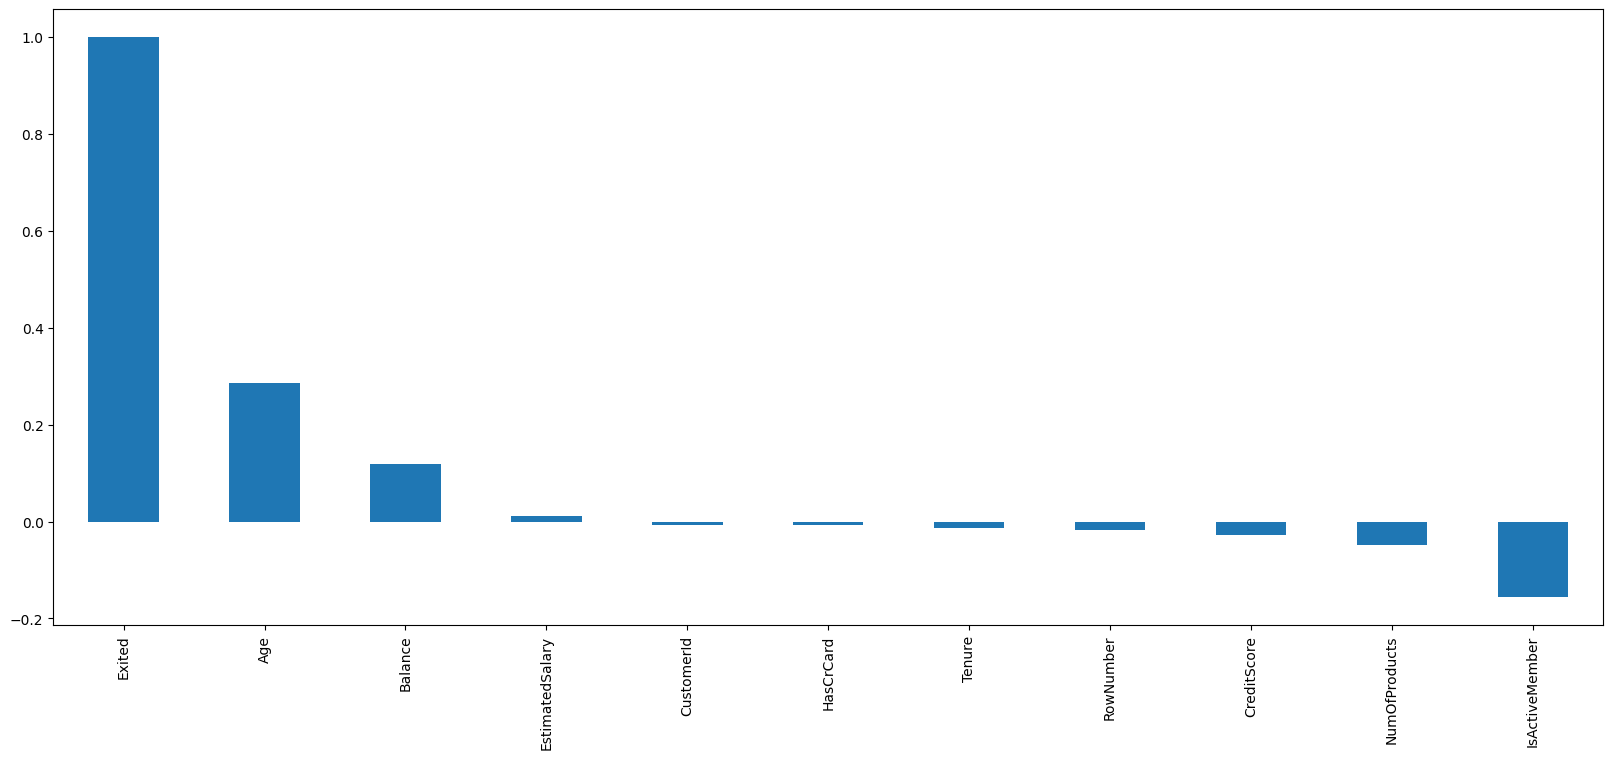

In [23]:
plt.figure(figsize=(20,8))
data.corr()["Exited"].sort_values(ascending=False).plot(kind="bar")

C:\Users\Dell\AppData\Local\Temp\ipykernel_29180\1218726923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="Paired")


<Axes: >

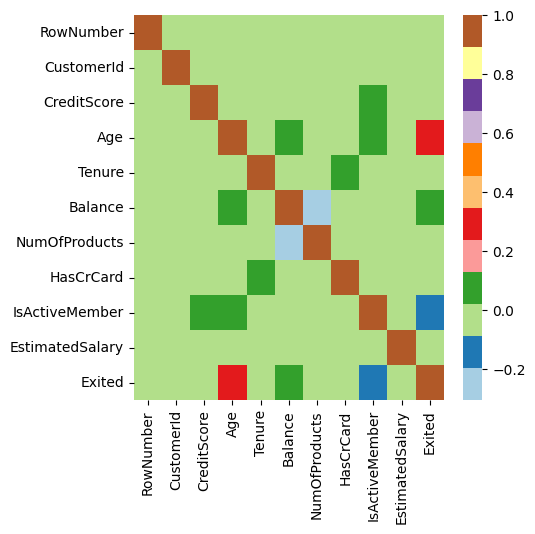

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),cmap="Paired")

In [42]:
data.Age.value_counts().sort_index(ascending=True)

18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: Age, Length: 70, dtype: int64

<Axes: >

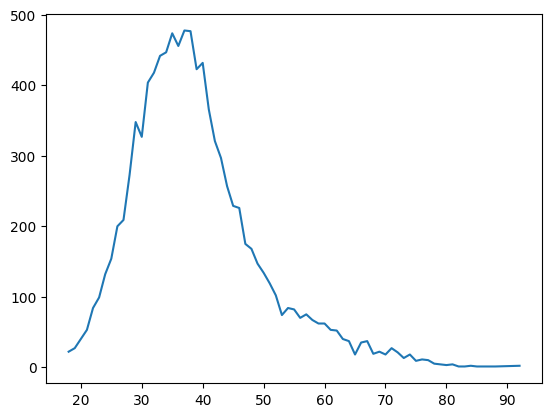

In [43]:
data.Age.value_counts().sort_index(ascending=True).plot()

In [35]:
data_1=data[data["Exited"]==1]

In [36]:
data_1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


<Axes: >

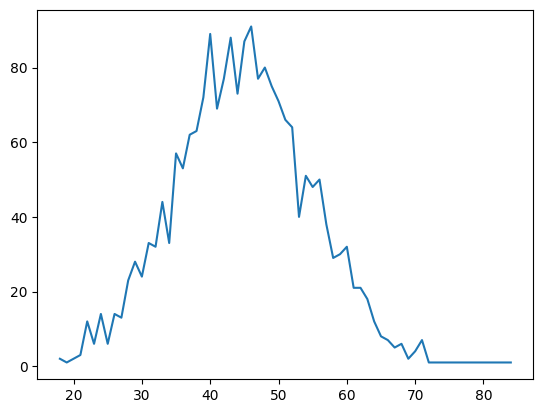

In [37]:
data_1.Age.value_counts().sort_index(ascending=True).plot()

### people who are churning are aged people between age grp of 38-38

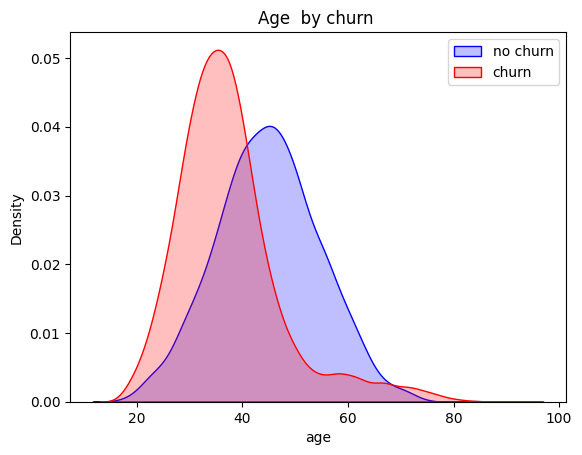

In [53]:
tot=sns.kdeplot(data.Age[data["Exited"]==1],color="blue",fill=True)
tot=sns.kdeplot(data.Age[data["Exited"]==0],color="red",fill=True)
plt.xlabel("age")
plt.title("Age  by churn ")
plt.legend(["no churn","churn"],loc="upper right")

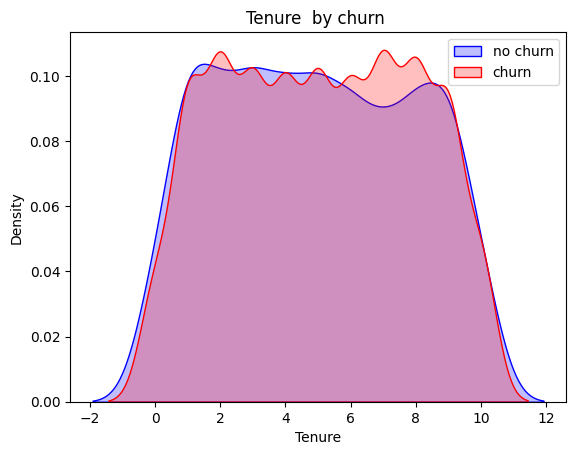

In [52]:
tot=sns.kdeplot(data.Tenure[data["Exited"]==1],color="blue",fill=True)
tot=sns.kdeplot(data.Tenure[data["Exited"]==0],color="red",fill=True)
plt.xlabel("Tenure")
plt.title("Tenure  by churn ")
plt.legend(["no churn","churn"],loc="upper right")